In [1]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd
import sqlite3 
from skfuzzy import control as ctrl

In [3]:
data = pd.read_csv('data.csv', delimiter=',')

In [4]:
data

,age,blood_sugar_level,amount_of_carbohydrates,mass_indexes
0,6.0,5.00,0.44,20.23
1,10.0,6.23,0.23,34.47
2,12.0,3.90,0.36,23.65
3,17.0,5.34,0.67,13.46
4,20.0,4.24,0.11,27.32
5,30.0,6.66,0.76,34.37
6,35.0,4.79,0.08,38.32
7,42.0,5.24,0.91,22.37
8,50.0,2.57,0.55,24.35
9,61.0,3.02,0.18,55.00


In [5]:
# Среднее значение для каждого из столбцов
mean_age = data['age'].mean()
mean_bsl = data['blood_sugar_level'].mean()
mean_aoc = data['amount_of_carbohydrates'].mean()
mean_mi = data['mass_indexes'].mean()

In [33]:
#Стандартное отклонение для каждого из столбцов
std_age = data['age'].std()
std_bsl = data['blood_sugar_level'].std()
std_aoc = data['amount_of_carbohydrates'].std()
std_mi = data['mass_indexes'].std()

In [34]:
age_data = pd.Series(data['age'].sort_values().tolist())
bcl_data = pd.Series(data['age'].sort_values().tolist())
aoc_data = pd.Series(data['age'].sort_values().tolist())
mi_data = pd.Series(data['age'].sort_values().tolist())

In [35]:
age = ctrl.Antecedent(age_data, 'age')

blood_sugar_level = ctrl.Antecedent(bcl_data, 'blood_sugar_level')

amount_of_carbohydrates = ctrl.Antecedent(aoc_data, 'amount_of_carbohydrates')

mass_indexes= ctrl.Antecedent(mi_data, 'mass_indexes')


risk_of_diabetes = ctrl.Consequent(np.arange(0, 101, 1), 'risk_of_diabetes')



In [73]:
# Подготовка данных age для отрезков low, medium, high
low_data_age = age_data[age_data <= (mean_age)]
medium_data_age = age_data[((mean_age -std_age) <= age_data) & (age_data <= (mean_age + std_age))]
high_data_age = age_data[age_data >= (mean_age)]

In [10]:
# Подготовка данных blood_sugar_level для отрезков low, medium, high
low_data_bcl = bcl_data[bcl_data < (mean_bsl - std_bsl)]
medium_data_bcl = bcl_data[((mean_bsl - std_bsl) <= bcl_data) & (bcl_data < (mean_bsl + std_bsl))]
high_data_bcl = bcl_data[bcl_data >= (mean_bsl + std_bsl)]

In [11]:
# Подготовка данных amount_of_carbohydrates для отрезков low, medium, high
low_data_aoc = aoc_data[aoc_data < (mean_aoc - std_aoc)]
medium_data_aoc = aoc_data[((mean_aoc - std_aoc) <= aoc_data) & (aoc_data < (mean_aoc + std_aoc))]
high_data_a = aoc_data[aoc_data >= (mean_aoc + std_aoc)]

In [12]:
# Подготовка данных mass_indexes для отрезков low, medium, high
low_data_mi = mi_data[mi_data < (mean_mi - std_mi)]
medium_data_mi = mi_data[((mean_mi - std_mi) <= mi_data) & (mi_data < (mean_mi + std_mi))]
high_data_mi = mi_data[mi_data >= (mean_mi + std_mi)]

In [70]:
# Назначение функций принадлежности
age['young'] = fuzz.trimf(np.array(age_data),[low_data_age.min(),low_data_age.min(),low_data_age.max()])
age['middle']= fuzz.trimf(np.array(age_data),[medium_data_age.min(),medium_data_age[medium_data_age.idxmin() + int((medium_data_age.idxmax() - medium_data_age.idxmin())/2)],medium_data_age.max()])
age['old'] = fuzz.trimf(np.array(age_data),[medium_data_age.max(),high_data_age.max(),high_data_age.max()])

In [77]:
medium_data_age.idxmin() + int((medium_data_age.idxmax() -medium_data_age.idxmin())/2)
high_data_age

17    35.0
18    35.0
19    38.0
20    40.0
21    42.0
22    49.0
23    50.0
24    51.0
25    53.0
26    55.0
27    59.0
28    61.0
29    65.0
30    82.0
dtype: float64

c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


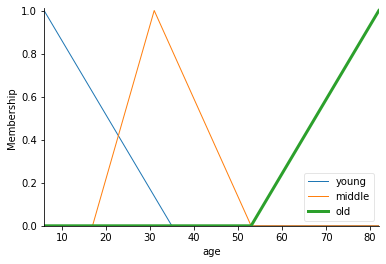

In [75]:
age['old'].view()

c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


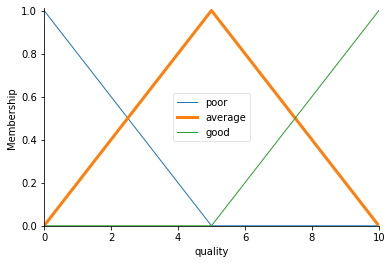

In [5]:
# You can see how these look with .view()
quality['average'].view()

c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


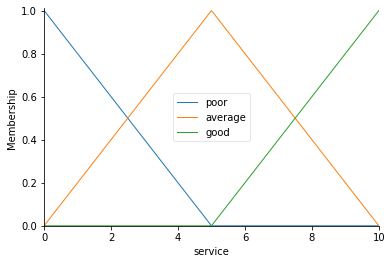

In [6]:
service.view()

c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


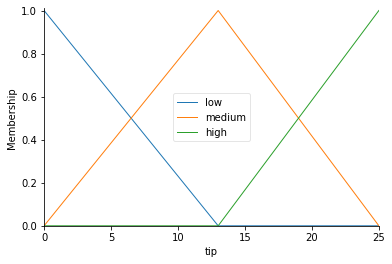

In [7]:
tip.view()

In [8]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

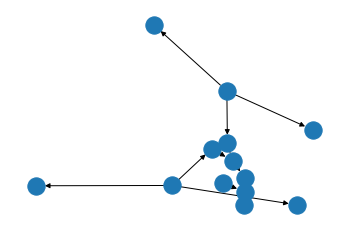

In [9]:
rule1.view()


In [10]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


In [11]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)


In [12]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.847607361963192


c:\users\костя\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


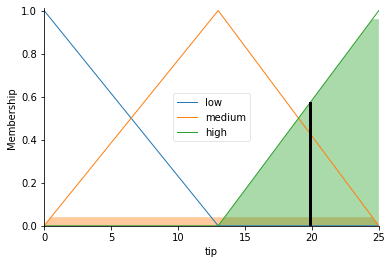

In [13]:
print(tipping.output['tip'])
tip.view(sim=tipping)